In [199]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [193]:
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=2, random_state=67)

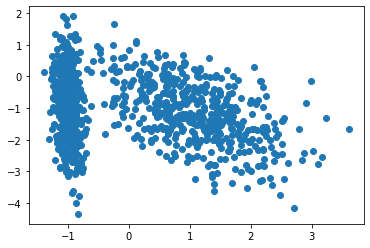

In [194]:
plt.scatter(X[:, 0], X[:, 1])

In [197]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [195]:
class KNNClassifier:
    def __init__(self, k:int) -> None:
        if k <= 0:
            raise ValueError('k must be a positive number')
        self.k = k
    
    def fit(self, X, y) -> 'KNNClassifier':
        self.x = X
        self.y = y
        
        return self
    
    def predict(self, points) -> int:
        predicted_labels = []
        
        for point in points:
            distances = np.linalg.norm(self.x - point, axis=1)
            neighbors_indexes = distances.argsort()[:self.k] 
            neighbors_labels = self.y[neighbors_indexes]

            labels_to_num = {label : np.count_nonzero(neighbors_labels == label) for label in set(neighbors_labels)}
            labels_to_num = sorted(labels_to_num.items(), key=lambda x: x[1], reverse=True)

            predicted_labels.append(labels_to_num[0][0])
            
        return np.array(predicted_labels)

In [202]:
model = KNNClassifier(k=3).fit(x_train, y_train)

In [203]:
my_predictions = model.predict(x_val)

In [204]:
accuracy_score(my_predictions, y_val)

0.9766666666666667

In [205]:
model = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [206]:
sklearn_predictions = model.predict(x_val)

In [207]:
accuracy_score(sklearn_predictions, y_val)

0.9766666666666667

In [208]:
(sklearn_predictions == my_predictions).all()

True